In [66]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
import shutil
import random
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import scipy
import dlib
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
EPOCHS = 10
BATCH_SIZE = 30
IMG_SIZE = 150
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [68]:
source_path = 'data_cropped'
#source_path = 'data_real'

source_path_level_0 = os.path.join(source_path, 'Level_0')
source_path_level_1 = os.path.join(source_path, 'Level_1')
source_path_level_2 = os.path.join(source_path, 'Level_2')

print(f"There are {len(os.listdir(source_path_level_0))} images in level 0.")
print(f"There are {len(os.listdir(source_path_level_1))} images of level 1.")
print(f"There are {len(os.listdir(source_path_level_2))} images of level 2.")

There are 385 images in level 0.
There are 473 images of level 1.
There are 129 images of level 2.


In [69]:

root_dir = 'data_cropped/split_data'
# root_dir = 'data_real/split_data'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):


  os.makedirs(root_path, exist_ok=True)

  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')

  train_level_0_dir = os.path.join(train_dir, 'Level_0')
  train_level_1_dir = os.path.join(train_dir, 'Level_1')
  train_level_2_dir = os.path.join(train_dir, 'Level_2')

  validation_level_0_dir = os.path.join(validation_dir, 'Level_0')
  validation_level_1_dir = os.path.join(validation_dir, 'Level_1')
  validation_level_2_dir = os.path.join(validation_dir, 'Level_2')

  os.makedirs(train_level_0_dir, exist_ok=True)
  os.makedirs(train_level_1_dir, exist_ok=True)
  os.makedirs(train_level_2_dir, exist_ok=True)
  os.makedirs(validation_level_0_dir, exist_ok=True)
  os.makedirs(validation_level_1_dir, exist_ok=True)
  os.makedirs(validation_level_2_dir, exist_ok=True)


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [70]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

data_cropped/split_data/training
data_cropped/split_data/validation
data_cropped/split_data/training/Level_2
data_cropped/split_data/training/Level_0
data_cropped/split_data/training/Level_1
data_cropped/split_data/validation/Level_2
data_cropped/split_data/validation/Level_0
data_cropped/split_data/validation/Level_1


In [71]:
# grader-required-cell

# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  ### START CODE HERE
  files = []
  for filename in os.listdir(SOURCE_DIR):
      file = SOURCE_DIR + filename
      if os.path.getsize(file) > 0:
          files.append(filename)
      else:
          print(f"{filename} is zero length, so ignoring.")


  random.shuffle(files)

  split_idx = int(SPLIT_SIZE * len(files))

  train_files = files[:split_idx]
  validation_files = files[split_idx:]

  for filename in train_files:
      source_file = os.path.join(SOURCE_DIR, filename)
      destination_file = os.path.join(TRAINING_DIR, filename)
      copyfile(source_file, destination_file)

  for filename in validation_files:
      source_file = os.path.join(SOURCE_DIR, filename)
      destination_file = os.path.join(VALIDATION_DIR, filename)
      copyfile(source_file, destination_file)


In [72]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_data(source_dir, train_dir, val_dir, test_dir, train_size, val_size):
    # Dapatkan daftar file dari direktori sumber
    files = os.listdir(source_dir)
    
    # Bagi dataset menjadi train+val dan test
    train_val_files, test_files = train_test_split(files, test_size=(1 - train_size), random_state=42)
    
    # Hitung ukuran set validation berdasarkan proporsi dari set train+val
    val_size_adjusted = val_size / (train_size + val_size)
    
    # Bagi train+val menjadi train dan val
    train_files, val_files = train_test_split(train_val_files, test_size=val_size_adjusted, random_state=42)
    
    # Pindahkan file ke direktori masing-masing
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(test_dir, file))

# Define paths
LEVEL_0_SOURCE_DIR = 'data_cropped/Level_0/'
LEVEL_1_SOURCE_DIR = 'data_cropped/Level_1/'
LEVEL_2_SOURCE_DIR = 'data_cropped/Level_2/'

TRAINING_DIR = "data_cropped/split_data/training/"
VALIDATION_DIR = "data_cropped/split_data/validation/"
TESTING_DIR = "data_cropped/split_data/testing/"

TRAINING_LEVEL_0_DIR = os.path.join(TRAINING_DIR, "Level_0/")
VALIDATION_LEVEL_0_DIR = os.path.join(VALIDATION_DIR, "Level_0/")
TESTING_LEVEL_0_DIR = os.path.join(TESTING_DIR, "Level_0/")

TRAINING_LEVEL_1_DIR = os.path.join(TRAINING_DIR, "Level_1/")
VALIDATION_LEVEL_1_DIR = os.path.join(VALIDATION_DIR, "Level_1/")
TESTING_LEVEL_1_DIR = os.path.join(TESTING_DIR, "Level_1/")

TRAINING_LEVEL_2_DIR = os.path.join(TRAINING_DIR, "Level_2/")
VALIDATION_LEVEL_2_DIR = os.path.join(VALIDATION_DIR, "Level_2/")
TESTING_LEVEL_2_DIR = os.path.join(TESTING_DIR, "Level_2/")

# Create directories if they don't exist
os.makedirs(TRAINING_LEVEL_0_DIR, exist_ok=True)
os.makedirs(VALIDATION_LEVEL_0_DIR, exist_ok=True)
os.makedirs(TESTING_LEVEL_0_DIR, exist_ok=True)

os.makedirs(TRAINING_LEVEL_1_DIR, exist_ok=True)
os.makedirs(VALIDATION_LEVEL_1_DIR, exist_ok=True)
os.makedirs(TESTING_LEVEL_1_DIR, exist_ok=True)

os.makedirs(TRAINING_LEVEL_2_DIR, exist_ok=True)
os.makedirs(VALIDATION_LEVEL_2_DIR, exist_ok=True)
os.makedirs(TESTING_LEVEL_2_DIR, exist_ok=True)

# Empty directories in case you run this cell multiple times
for dir_path in [TRAINING_LEVEL_0_DIR, VALIDATION_LEVEL_0_DIR, TESTING_LEVEL_0_DIR,
                 TRAINING_LEVEL_1_DIR, VALIDATION_LEVEL_1_DIR, TESTING_LEVEL_1_DIR,
                 TRAINING_LEVEL_2_DIR, VALIDATION_LEVEL_2_DIR, TESTING_LEVEL_2_DIR]:
    for file in os.scandir(dir_path):
        os.remove(file.path)

# Define split sizes
train_size = 0.7
val_size = 0.2
test_size = 0.1

# Perform the split
split_data(LEVEL_0_SOURCE_DIR, TRAINING_LEVEL_0_DIR, VALIDATION_LEVEL_0_DIR, TESTING_LEVEL_0_DIR, train_size, val_size)
split_data(LEVEL_1_SOURCE_DIR, TRAINING_LEVEL_1_DIR, VALIDATION_LEVEL_1_DIR, TESTING_LEVEL_1_DIR, train_size, val_size)
split_data(LEVEL_2_SOURCE_DIR, TRAINING_LEVEL_2_DIR, VALIDATION_LEVEL_2_DIR, TESTING_LEVEL_2_DIR, train_size, val_size)

print(f"Training level 0's directory has {len(os.listdir(TRAINING_LEVEL_0_DIR))} images")
print(f"Validation level 0's directory has {len(os.listdir(VALIDATION_LEVEL_0_DIR))} images")
print(f"Testing level 0's directory has {len(os.listdir(TESTING_LEVEL_0_DIR))} images")

print(f"Training level 1's directory has {len(os.listdir(TRAINING_LEVEL_1_DIR))} images")
print(f"Validation level 1's directory has {len(os.listdir(VALIDATION_LEVEL_1_DIR))} images")
print(f"Testing level 1's directory has {len(os.listdir(TESTING_LEVEL_1_DIR))} images")

print(f"Training level 2's directory has {len(os.listdir(TRAINING_LEVEL_2_DIR))} images")
print(f"Validation level 2's directory has {len(os.listdir(VALIDATION_LEVEL_2_DIR))} images")
print(f"Testing level 2's directory has {len(os.listdir(TESTING_LEVEL_2_DIR))} images")


Training level 0's directory has 209 images
Validation level 0's directory has 60 images
Testing level 0's directory has 116 images
Training level 1's directory has 257 images
Validation level 1's directory has 74 images
Testing level 1's directory has 142 images
Training level 2's directory has 69 images
Validation level 2's directory has 21 images
Testing level 2's directory has 39 images


In [73]:
# # grader-required-cell

# # Test your split_data function

# # Define paths

# LEVEL_0_SOURCE_DIR = 'data_cropped/Level_0/'
# LEVEL_1_SOURCE_DIR = 'data_cropped/Level_1/'
# LEVEL_2_SOURCE_DIR = 'data_cropped/Level_2/'

# TRAINING_DIR = "data_cropped/split_data/training/"
# VALIDATION_DIR = "data_cropped/split_data/validation/"

# TRAINING_LEVEL_0_DIR = os.path.join(TRAINING_DIR, "Level_0/")
# VALIDATION_LEVEL_0_DIR = os.path.join(VALIDATION_DIR, "Level_0/")

# TRAINING_LEVEL_1_DIR = os.path.join(TRAINING_DIR, "Level_1/")
# VALIDATION_LEVEL_1_DIR = os.path.join(VALIDATION_DIR, "Level_1/")

# TRAINING_LEVEL_2_DIR = os.path.join(TRAINING_DIR, "Level_2/")
# VALIDATION_LEVEL_2_DIR = os.path.join(VALIDATION_DIR, "Level_2/")


# # Empty directories in case you run this cell multiple times
# if len(os.listdir(TRAINING_LEVEL_0_DIR)) > 0:
#   for file in os.scandir(TRAINING_LEVEL_0_DIR):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_LEVEL_1_DIR)) > 0:
#   for file in os.scandir(TRAINING_LEVEL_1_DIR):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_LEVEL_2_DIR)) > 0:
#   for file in os.scandir(TRAINING_LEVEL_2_DIR):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_LEVEL_0_DIR)) > 0:
#   for file in os.scandir(VALIDATION_LEVEL_0_DIR):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_LEVEL_1_DIR)) > 0:
#   for file in os.scandir(VALIDATION_LEVEL_1_DIR):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_LEVEL_2_DIR)) > 0:
#   for file in os.scandir(VALIDATION_LEVEL_2_DIR):
#     os.remove(file.path)


# split_size = .8

# split_data(LEVEL_0_SOURCE_DIR, TRAINING_LEVEL_0_DIR, VALIDATION_LEVEL_0_DIR, split_size)
# split_data(LEVEL_1_SOURCE_DIR, TRAINING_LEVEL_1_DIR, VALIDATION_LEVEL_1_DIR, split_size)
# split_data(LEVEL_2_SOURCE_DIR, TRAINING_LEVEL_2_DIR, VALIDATION_LEVEL_2_DIR, split_size)

# print(f"Training level 0's directory has {len(os.listdir(TRAINING_LEVEL_0_DIR))} images")
# print(f"Training level 1's directory has {len(os.listdir(TRAINING_LEVEL_1_DIR))} images")
# print(f"Training level 2's directory has {len(os.listdir(TRAINING_LEVEL_2_DIR))} images")

# print(f"There are {len(os.listdir(TRAINING_LEVEL_0_DIR))} images of level 0 for training")
# print(f"There are {len(os.listdir(TRAINING_LEVEL_1_DIR))} images of level 1 for training")
# print(f"There are {len(os.listdir(TRAINING_LEVEL_2_DIR))} images of level 2 for training")
# print(f"There are {len(os.listdir(VALIDATION_LEVEL_0_DIR))} images of level 0 for validation")
# print(f"There are {len(os.listdir(VALIDATION_LEVEL_1_DIR))} images of level 1 for validation")
# print(f"There are {len(os.listdir(VALIDATION_LEVEL_2_DIR))} images of level 2 for validation")

In [74]:
def get_image_size(image_path):
  try:
    with Image.open(image_path) as image:
      width, height = image.size
      return width, height
  except IOError as e:
    print(f"Error opening image: {e}")
    return None 

In [75]:
# image_path_1 = "data_cropped/Level_0/levle0_2.jpg"
# image_path_2 = "data_cropped/Level_1/levle1_26.jpg"
# image_path_3 = "data_cropped/Level_2/levle2_30.jpg"

# width, height = get_image_size(image_path_1)
# print(f"Image 1: width={width}, height={height}")

# width, height = get_image_size(image_path_2)
# print(f"Image 2: width={width}, height={height}")

# width, height = get_image_size(image_path_3)
# print(f"Image 3: width={width}, height={height}")

In [76]:
def crop_image(image):
    # Perform cropping operation here
    cropped_image = image[50:150, 50:150, :]  # Example: crop a region of interest
    
    return cropped_image

In [77]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Define the ImageDataGenerator for training data with cropping
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generate batches of training data
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=30,
        class_mode='sparse',
        target_size=(150, 150),
    )

    # Define the ImageDataGenerator for validation data without cropping
    validation_datagen = ImageDataGenerator(rescale=1/255)

    # Generate batches of validation data
    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=30,
        class_mode='sparse',
        target_size=(150, 150)
    )

    return train_generator, validation_generator

In [78]:
train_gen, val_gen = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 535 images belonging to 3 classes.
Found 155 images belonging to 3 classes.


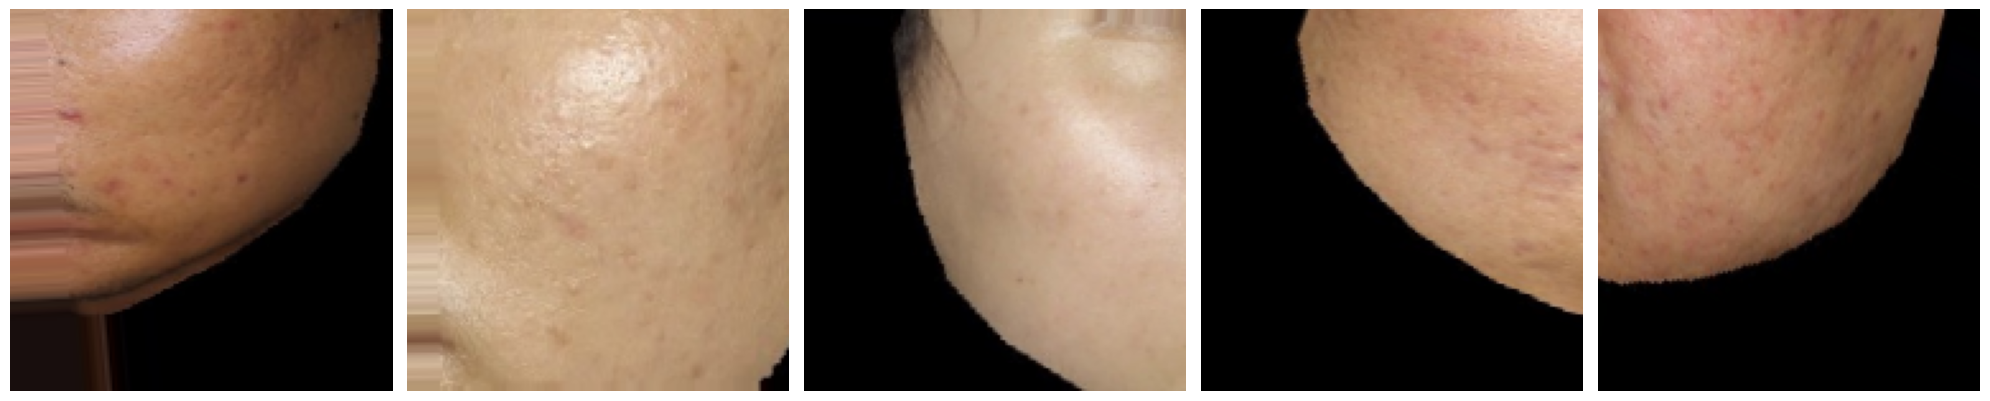

In [79]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_gen)

plot_images(sample_training_images[:5])

In [89]:
# import efficientnet
from tensorflow.keras.applications import EfficientNetB0, MobileNet

# Create an instance of the model
input_layer = tf.keras.layers.Input(shape=(150, 150, 3))

model = MobileNet( weights='imagenet',include_top=False, input_tensor=input_layer)

# Freeze the pre-trained weights
model.trainable = True

# Add a global average pooling layer
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(model.input, x)



17225924/17225924 [==============================] - 26s 2us/step


In [90]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32)        128 

In [91]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10, verbose=1)

Epoch 1/10
18/18 [==============================] - 7s 309ms/step - loss: 13.5263 - accuracy: 0.5850 - val_loss: 21.4055 - val_accuracy: 0.4774
Epoch 2/10
18/18 [==============================] - 6s 316ms/step - loss: 2.4197 - accuracy: 0.7252 - val_loss: 14.1488 - val_accuracy: 0.4774
Epoch 3/10
18/18 [==============================] - 5s 292ms/step - loss: 1.5730 - accuracy: 0.8374 - val_loss: 10.9455 - val_accuracy: 0.4774
Epoch 4/10
18/18 [==============================] - 5s 268ms/step - loss: 1.3798 - accuracy: 0.8598 - val_loss: 18.2762 - val_accuracy: 0.4774
Epoch 5/10
18/18 [==============================] - 5s 262ms/step - loss: 1.2126 - accuracy: 0.8411 - val_loss: 14.5372 - val_accuracy: 0.5032
Epoch 6/10
18/18 [==============================] - 5s 260ms/step - loss: 1.0537 - accuracy: 0.8542 - val_loss: 12.5555 - val_accuracy: 0.5290
Epoch 7/10
18/18 [==============================] - 5s 262ms/step - loss: 0.8246 - accuracy: 0.8710 - val_loss: 11.1005 - val_accuracy: 0.638

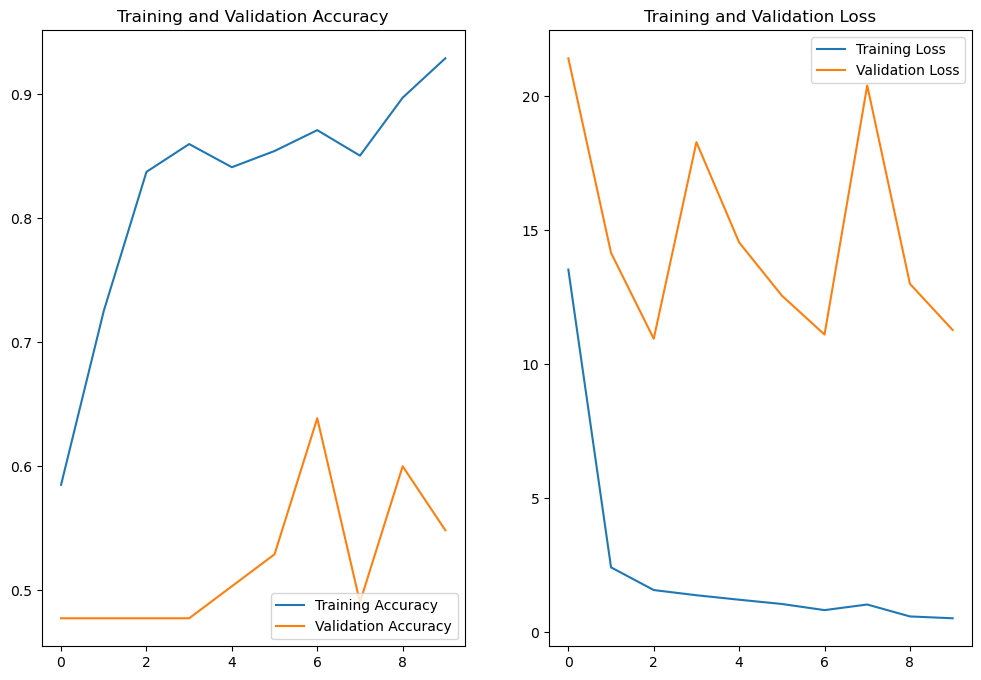

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS=10

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [93]:
# Data generator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(VALIDATION_DIR,
                                                target_size=IMG_SHAPE[:2],
                                                batch_size=BATCH_SIZE,
                                                class_mode='sparse',
                                                shuffle=False)

# Predicting the validation data
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Classification Report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=class_labels))

Found 155 images belonging to 3 classes.
6/6 [==============================] - 1s 51ms/step
Classification Report
              precision    recall  f1-score   support

     Level_0       0.78      0.12      0.20        60
     Level_1       0.52      1.00      0.69        74
     Level_2       1.00      0.19      0.32        21

    accuracy                           0.55       155
   macro avg       0.77      0.44      0.40       155
weighted avg       0.69      0.55      0.45       155



In [94]:
# Path to the test data directory
TESTING_LEVEL_0_DIR = 'data_cropped/split_data/testing/Level_0/'
TESTING_LEVEL_1_DIR = 'data_cropped/split_data/testing/Level_1/'
TESTING_LEVEL_2_DIR = 'data_cropped/split_data/testing/Level_2/'

# ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=0.2)

# Create a generator for the test data
test_generator = test_datagen.flow_from_directory(
    'data_cropped/split_data/testing',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 297 images belonging to 3 classes.


In [95]:
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_classes = test_generator.classes

# Calculate accuracy
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f'Test accuracy: {accuracy:.2f}')

# Print out a few predictions and their corresponding true labels
for i in range(10):  # print first 10 examples
    print(f'Predicted: {predicted_classes[i]}, True: {true_classes[i]}')

10/10 [==============================] - 1s 60ms/step
Test accuracy: 0.48
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0


In [ ]:
# # Menyimpan model
# model.save('saved_model/my_model')

# # Untuk menyimpan model sebagai format TF Lite
# converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/my_model')
# tflite_model = converter.convert()
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

In [34]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


  return model

In [35]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 256)       0

In [47]:
CLASS_WEIGHT = {0: 1.0, 1: 1.0, 2: 3.0}

history = model.fit(train_gen,
                    epochs=30,
                    verbose=1,
                    validation_data=val_gen,
                    class_weight=CLASS_WEIGHT)

Epoch 1/30
27/27 [==============================] - 11s 413ms/step - loss: 1.1292 - accuracy: 0.6248 - val_loss: 0.5836 - val_accuracy: 0.7576
Epoch 2/30
27/27 [==============================] - 11s 409ms/step - loss: 0.9818 - accuracy: 0.6882 - val_loss: 0.5274 - val_accuracy: 0.8232
Epoch 3/30
27/27 [==============================] - 11s 411ms/step - loss: 0.9658 - accuracy: 0.6654 - val_loss: 0.5168 - val_accuracy: 0.8283
Epoch 4/30
27/27 [==============================] - 11s 412ms/step - loss: 1.0542 - accuracy: 0.6755 - val_loss: 0.6059 - val_accuracy: 0.7525
Epoch 5/30
27/27 [==============================] - 11s 410ms/step - loss: 0.9884 - accuracy: 0.6984 - val_loss: 0.5093 - val_accuracy: 0.7980
Epoch 6/30
27/27 [==============================] - 11s 411ms/step - loss: 0.9402 - accuracy: 0.6933 - val_loss: 0.5165 - val_accuracy: 0.7727
Epoch 7/30
27/27 [==============================] - 11s 412ms/step - loss: 0.9717 - accuracy: 0.6591 - val_loss: 0.5946 - val_accuracy: 0.7424

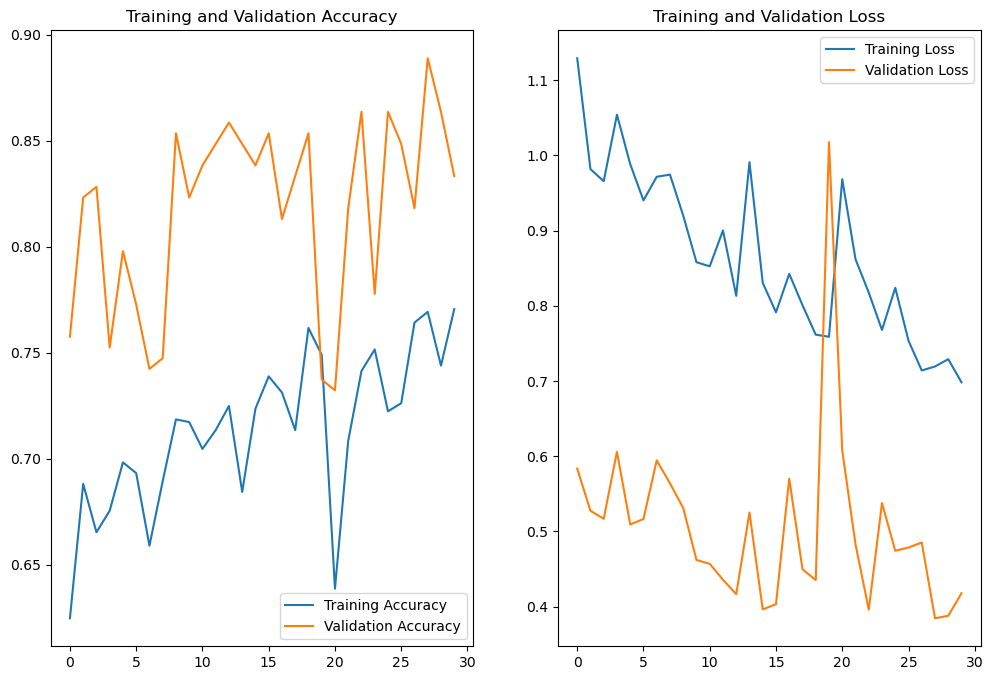

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 30
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
# Data generator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(VALIDATION_DIR,
                                                target_size=IMG_SHAPE[:2],
                                                batch_size=BATCH_SIZE,
                                                class_mode='sparse',
                                                shuffle=False)

# Predicting the validation data
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Classification Report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=class_labels))

Found 198 images belonging to 3 classes.
7/7 [==============================] - 1s 131ms/step
Classification Report
              precision    recall  f1-score   support

     Level_0       0.95      0.77      0.85        77
     Level_1       0.82      0.91      0.86        95
     Level_2       0.65      0.77      0.70        26

    accuracy                           0.83       198
   macro avg       0.81      0.81      0.80       198
weighted avg       0.85      0.83      0.83       198



In [52]:
# Menyimpan model
model.save('saved_model/my_model')

# Untuk menyimpan model sebagai format TF Lite
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/my_model')
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets
2024-06-07 22:11:12.447284: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-06-07 22:11:12.447294: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-06-07 22:11:12.447404: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model/my_model
2024-06-07 22:11:12.448632: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-07 22:11:12.448637: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model/my_model
2024-06-07 22:11:12.452381: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-06-07 22:11:12.531952: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: saved_model/my_model
2024-06-07 22:11:12.548211: I tensorflow/cc/saved_model/loader.cc